In [1]:
import TCDF
import argparse
import torch
import pandas as pd
import numpy as np
import networkx as nx
import pylab
import copy
import matplotlib.pyplot as plt
import os
import sys

Arguments: Namespace(cuda=True, data=['data/gang_morning.csv'], dilation_coefficient=3, epochs=1000, ground_truth=None, hidden_layers=2, kernel_size=3, learning_rate=0.01, log_interval=500, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  gang_morning.csv

 Analysis started for target:  1220029700
Epoch:  1 [0%] 	Loss: 605.279053
Epoch: 500 [50%] 	Loss: 0.028918
Epoch: 1000 [100%] 	Loss: 0.001470
Potential causes:  [48, 19]
48 : 0.04467816278338432
19 : 0.4035017192363739
Validated causes:  [48, 19]

 Analysis started for target:  1220032100
Epoch:  1 [0%] 	Loss: 440.392792
Epoch: 500 [50%] 	Loss: 0.000001
Epoch: 1000 [100%] 	Loss: 0.000003
Potential causes:  [48, 54, 19]
48 : 0.08401568233966827
54 : 0.39414486289024353
19 : 0.39144963026046753
Validated causes:  [48, 54, 19]

 Analysis started for target:  1220033000
Epoch:  1 [0%] 	Loss: 273.131317
Epoch: 500 [50%] 	Loss: 0.001356
Epoch: 1000 [100%] 	Loss: 0.000000
Potential causes:  [48, 54, 20]
48 : 0.46098941

Epoch: 500 [50%] 	Loss: 0.001073
Epoch: 1000 [100%] 	Loss: 0.000166
Potential causes:  [20, 48]
20 : 0.25266993045806885
48 : 0.08407570421695709
Validated causes:  [20, 48]

 Analysis started for target:  1220031300
Epoch:  1 [0%] 	Loss: 177.639328
Epoch: 500 [50%] 	Loss: 0.000042
Epoch: 1000 [100%] 	Loss: 0.000100
Potential causes:  [13, 37, 56]
13 : 0.09067275375127792
37 : 0.00022212578915059566
56 : 0.00028276603552512825
Validated causes:  [13, 37, 56]

 Analysis started for target:  1220028300
Epoch:  1 [0%] 	Loss: 493.950378
Epoch: 500 [50%] 	Loss: 0.000163
Epoch: 1000 [100%] 	Loss: 0.000001
Potential causes:  [48, 6, 54, 56, 19, 18]
48 : 5.68982458114624
6 : 0.020965009927749634
54 : 3.2500076486030594e-05
56 : 9.889647481031716e-05
19 : 0.008602908812463284
18 : 0.0002483666758053005
Validated causes:  [48, 6, 54, 56, 19, 18]

 Analysis started for target:  1220030100
Epoch:  1 [0%] 	Loss: 549.001221
Epoch: 500 [50%] 	Loss: 0.022409
Epoch: 1000 [100%] 	Loss: 0.000007
Potentia

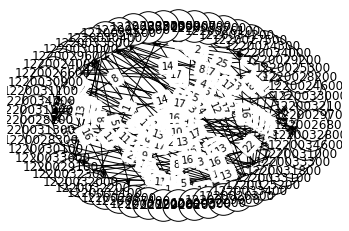

In [5]:
%run -i "runTCDF.py" --data data/gang_morning.csv --cuda --significance 0.8 --hidden_layers 2 --kernel_size 3 --log_interval 500 --epochs 1000 --plot --dilation_coefficient 3

In [6]:
a = np.load('scores_list.npy')

Estimated variable usage = 28.08%


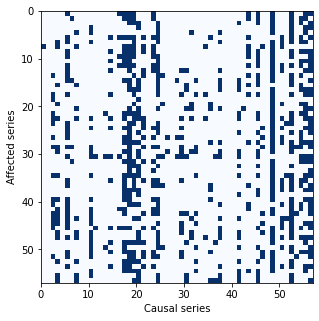

In [21]:
fig, axarr = plt.subplots( figsize=(10, 5))
axarr.imshow(a, cmap='Blues', vmin=0, vmax=1, extent=(0, len(a), len(a), 0))
axarr.set_ylabel('Affected series')
axarr.set_xlabel('Causal series')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(a)))
#print('less loss = ',min(train_loss_adam).cpu().numpy())

In [19]:
for i in range(57):
    for j in range(57):
        if a[i,j] <= 1:
            a[i,j] = 0

In [20]:
a

array([[0.        , 0.        , 0.        , ..., 0.        , 1.14588583,
        1.29199839],
       [0.        , 0.        , 0.        , ..., 1.69843125, 1.01008022,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.79246104, 0.        ,
        1.00512755],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.04514503,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.02188373]])